In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from __future__ import print_function

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 20

# Degrading a Spectrum to Lower Resolution



In [2]:
import coronagraph as cg
print(cg.__version__)

0.0.2


First, let's grab the stellar spectral energy distribution (SED) of Proxima Centauri from the VPL website: 

In [3]:
url = "http://vpl.astro.washington.edu/spectra/stellar/proxima_cen_sed.txt"

import urllib.request
response = urllib.request.urlopen(url)

# Read file lines
data = response.readlines()

# Remove header and extraneous info
tmp = np.array([np.array(str(d).split("\\")) for d in data[25:]])[:,[1,2]]

# Extract columns
lam = np.array([float(d[1:]) for d in tmp[:,0]])
flux = np.array([float(d[1:]) for d in tmp[:,1]])

Now let's set the min and max for our low res wavelength grid, use `construct_lam` to create the low-res wavelength grid, use `downbin_spec` to make a low-res spectrum, and plot it. 

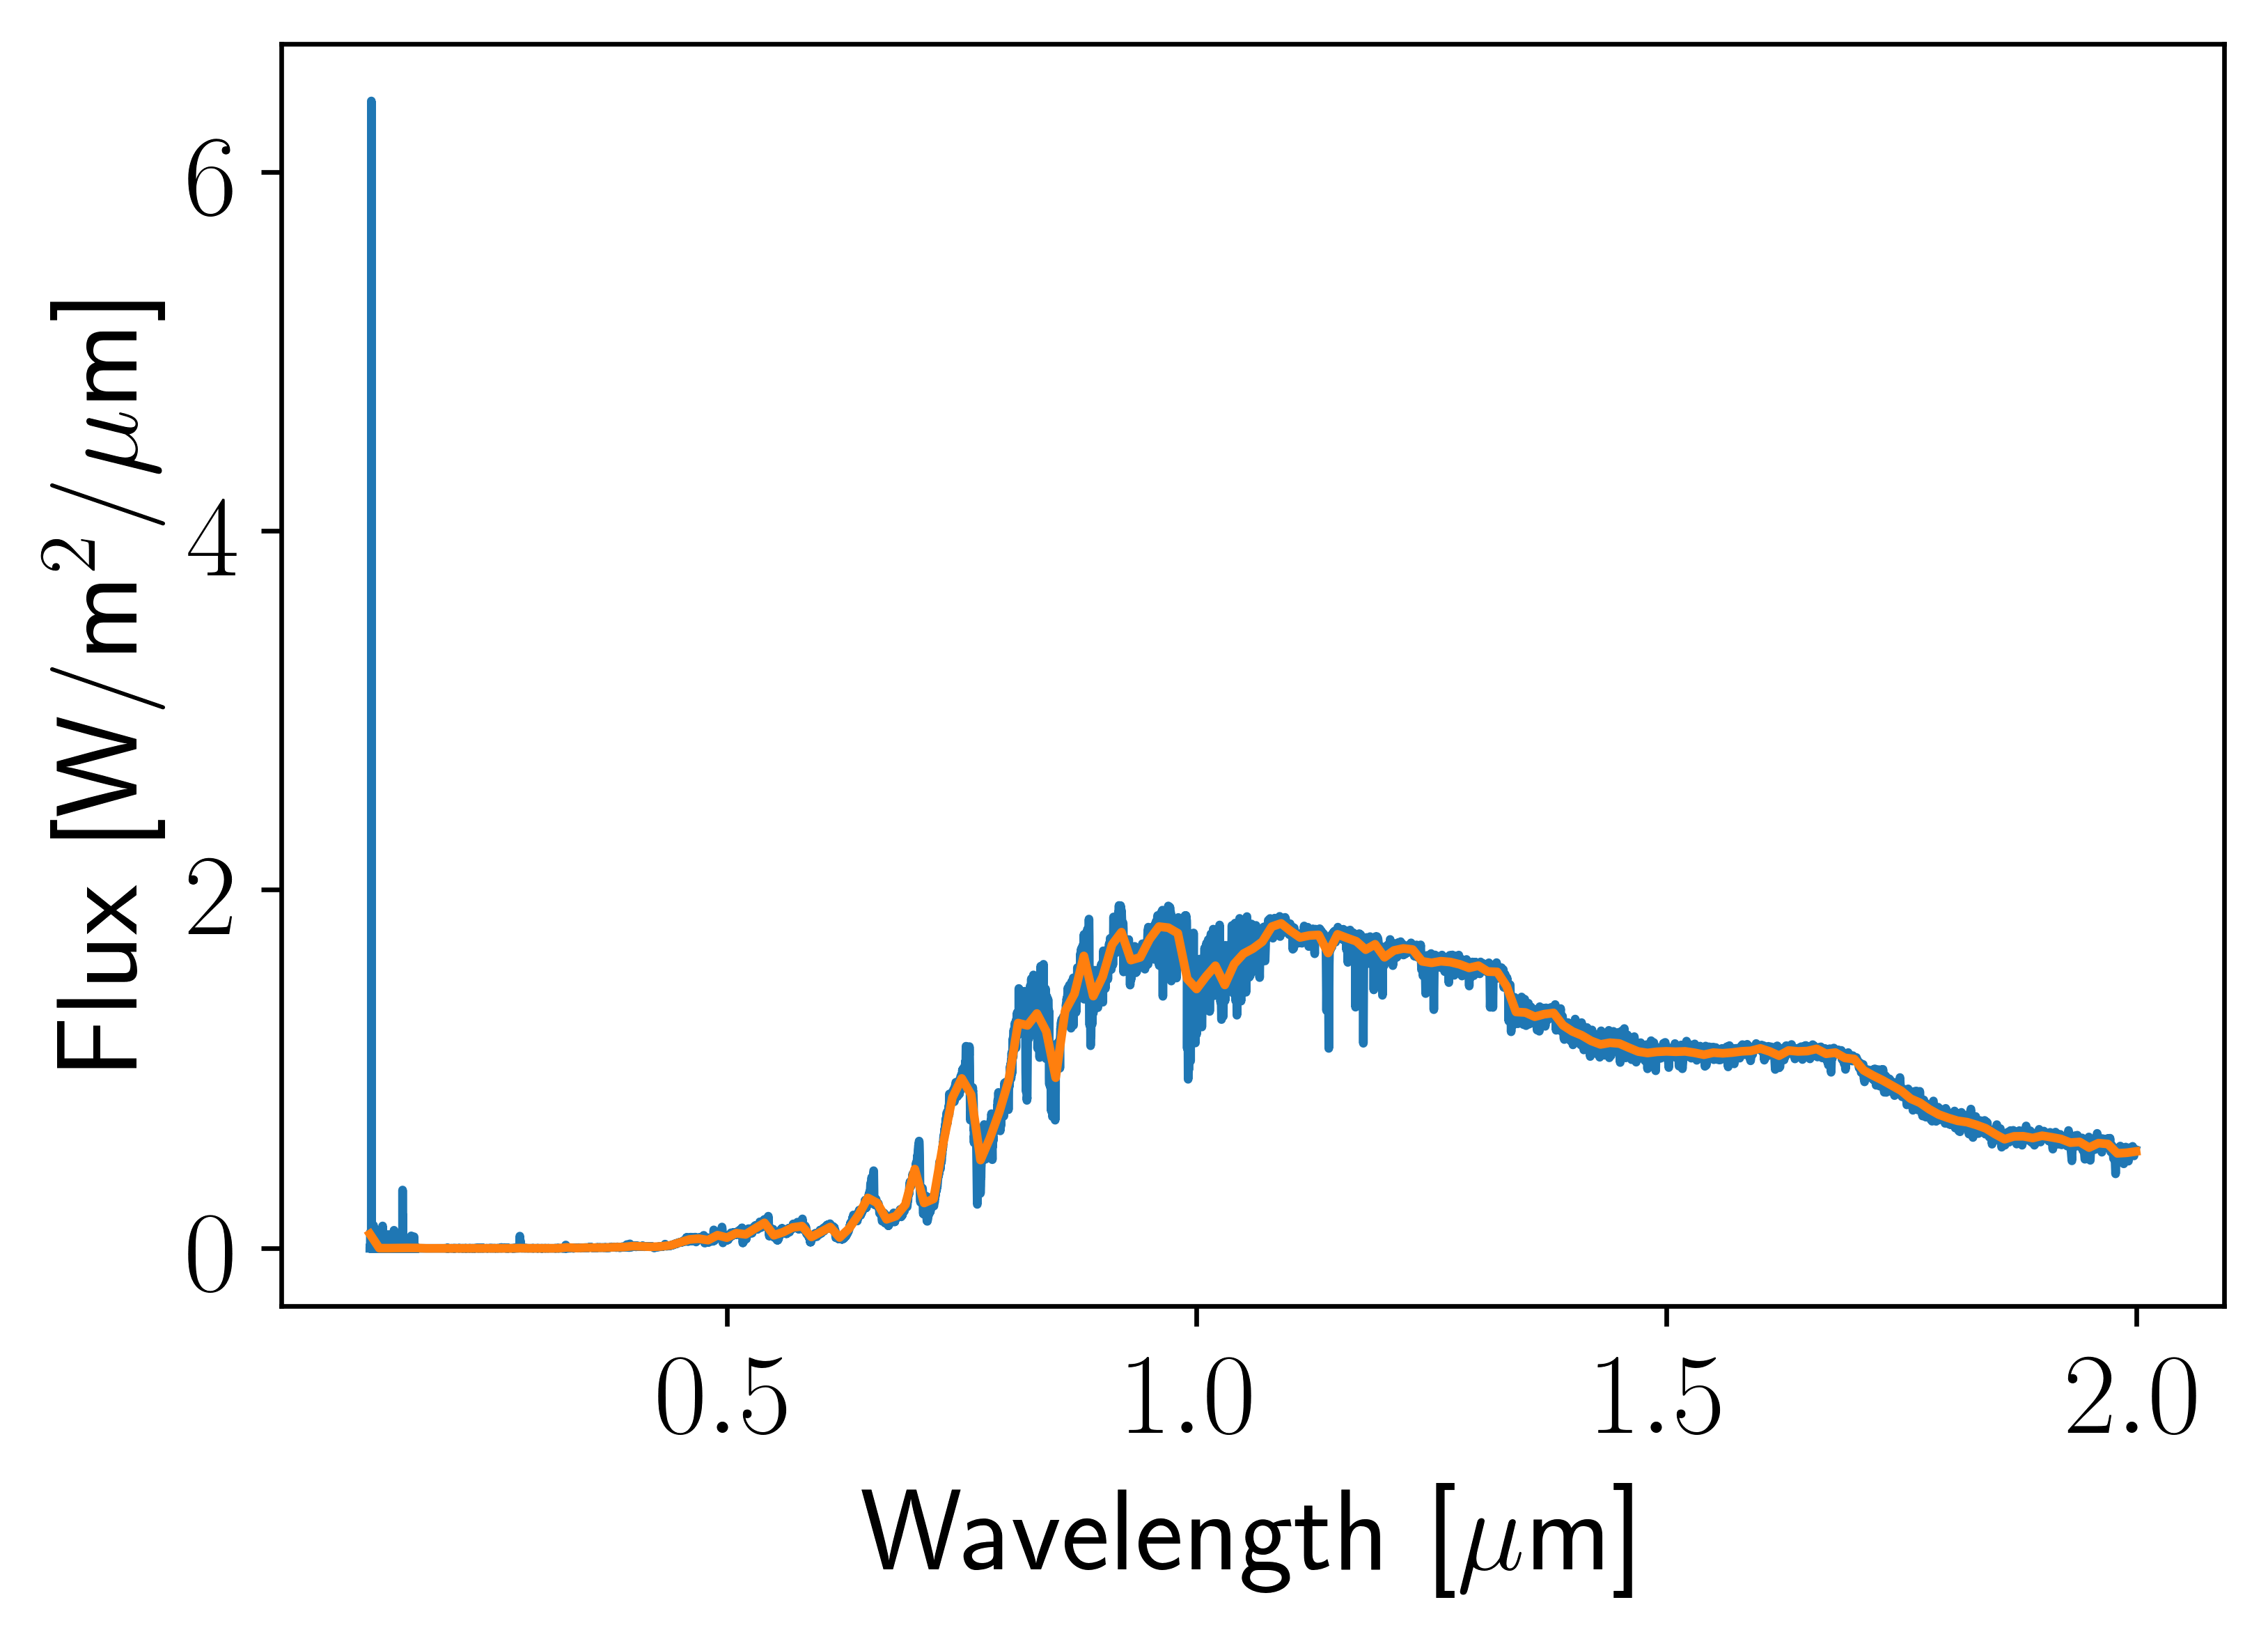

In [4]:
lammin = 0.12
lammax = 2.0
R = 200
dl = 0.01

# Construct new low-res wavelength grid
wl, dwl = cg.noise_routines.construct_lam(lammin, lammax, dlam = dl)

# Down-bin flux to low-res
flr = cg.downbin_spec(flux, lam, wl, dlam=dwl)

# Plot
m = (lam > lammin) & (lam < lammax)
plt.plot(lam[m], flux[m])
plt.plot(wl, flr)
#plt.yscale("log")
plt.xlabel(r"Wavelength [$\mu$m]")
plt.ylabel(r"Flux [W/m$^2$/$\mu$m]");

How many NaNs?

In [5]:
print(np.sum(~np.isfinite(flr)))

0


Let's try it again now focusing on the UV with a higher resolution.

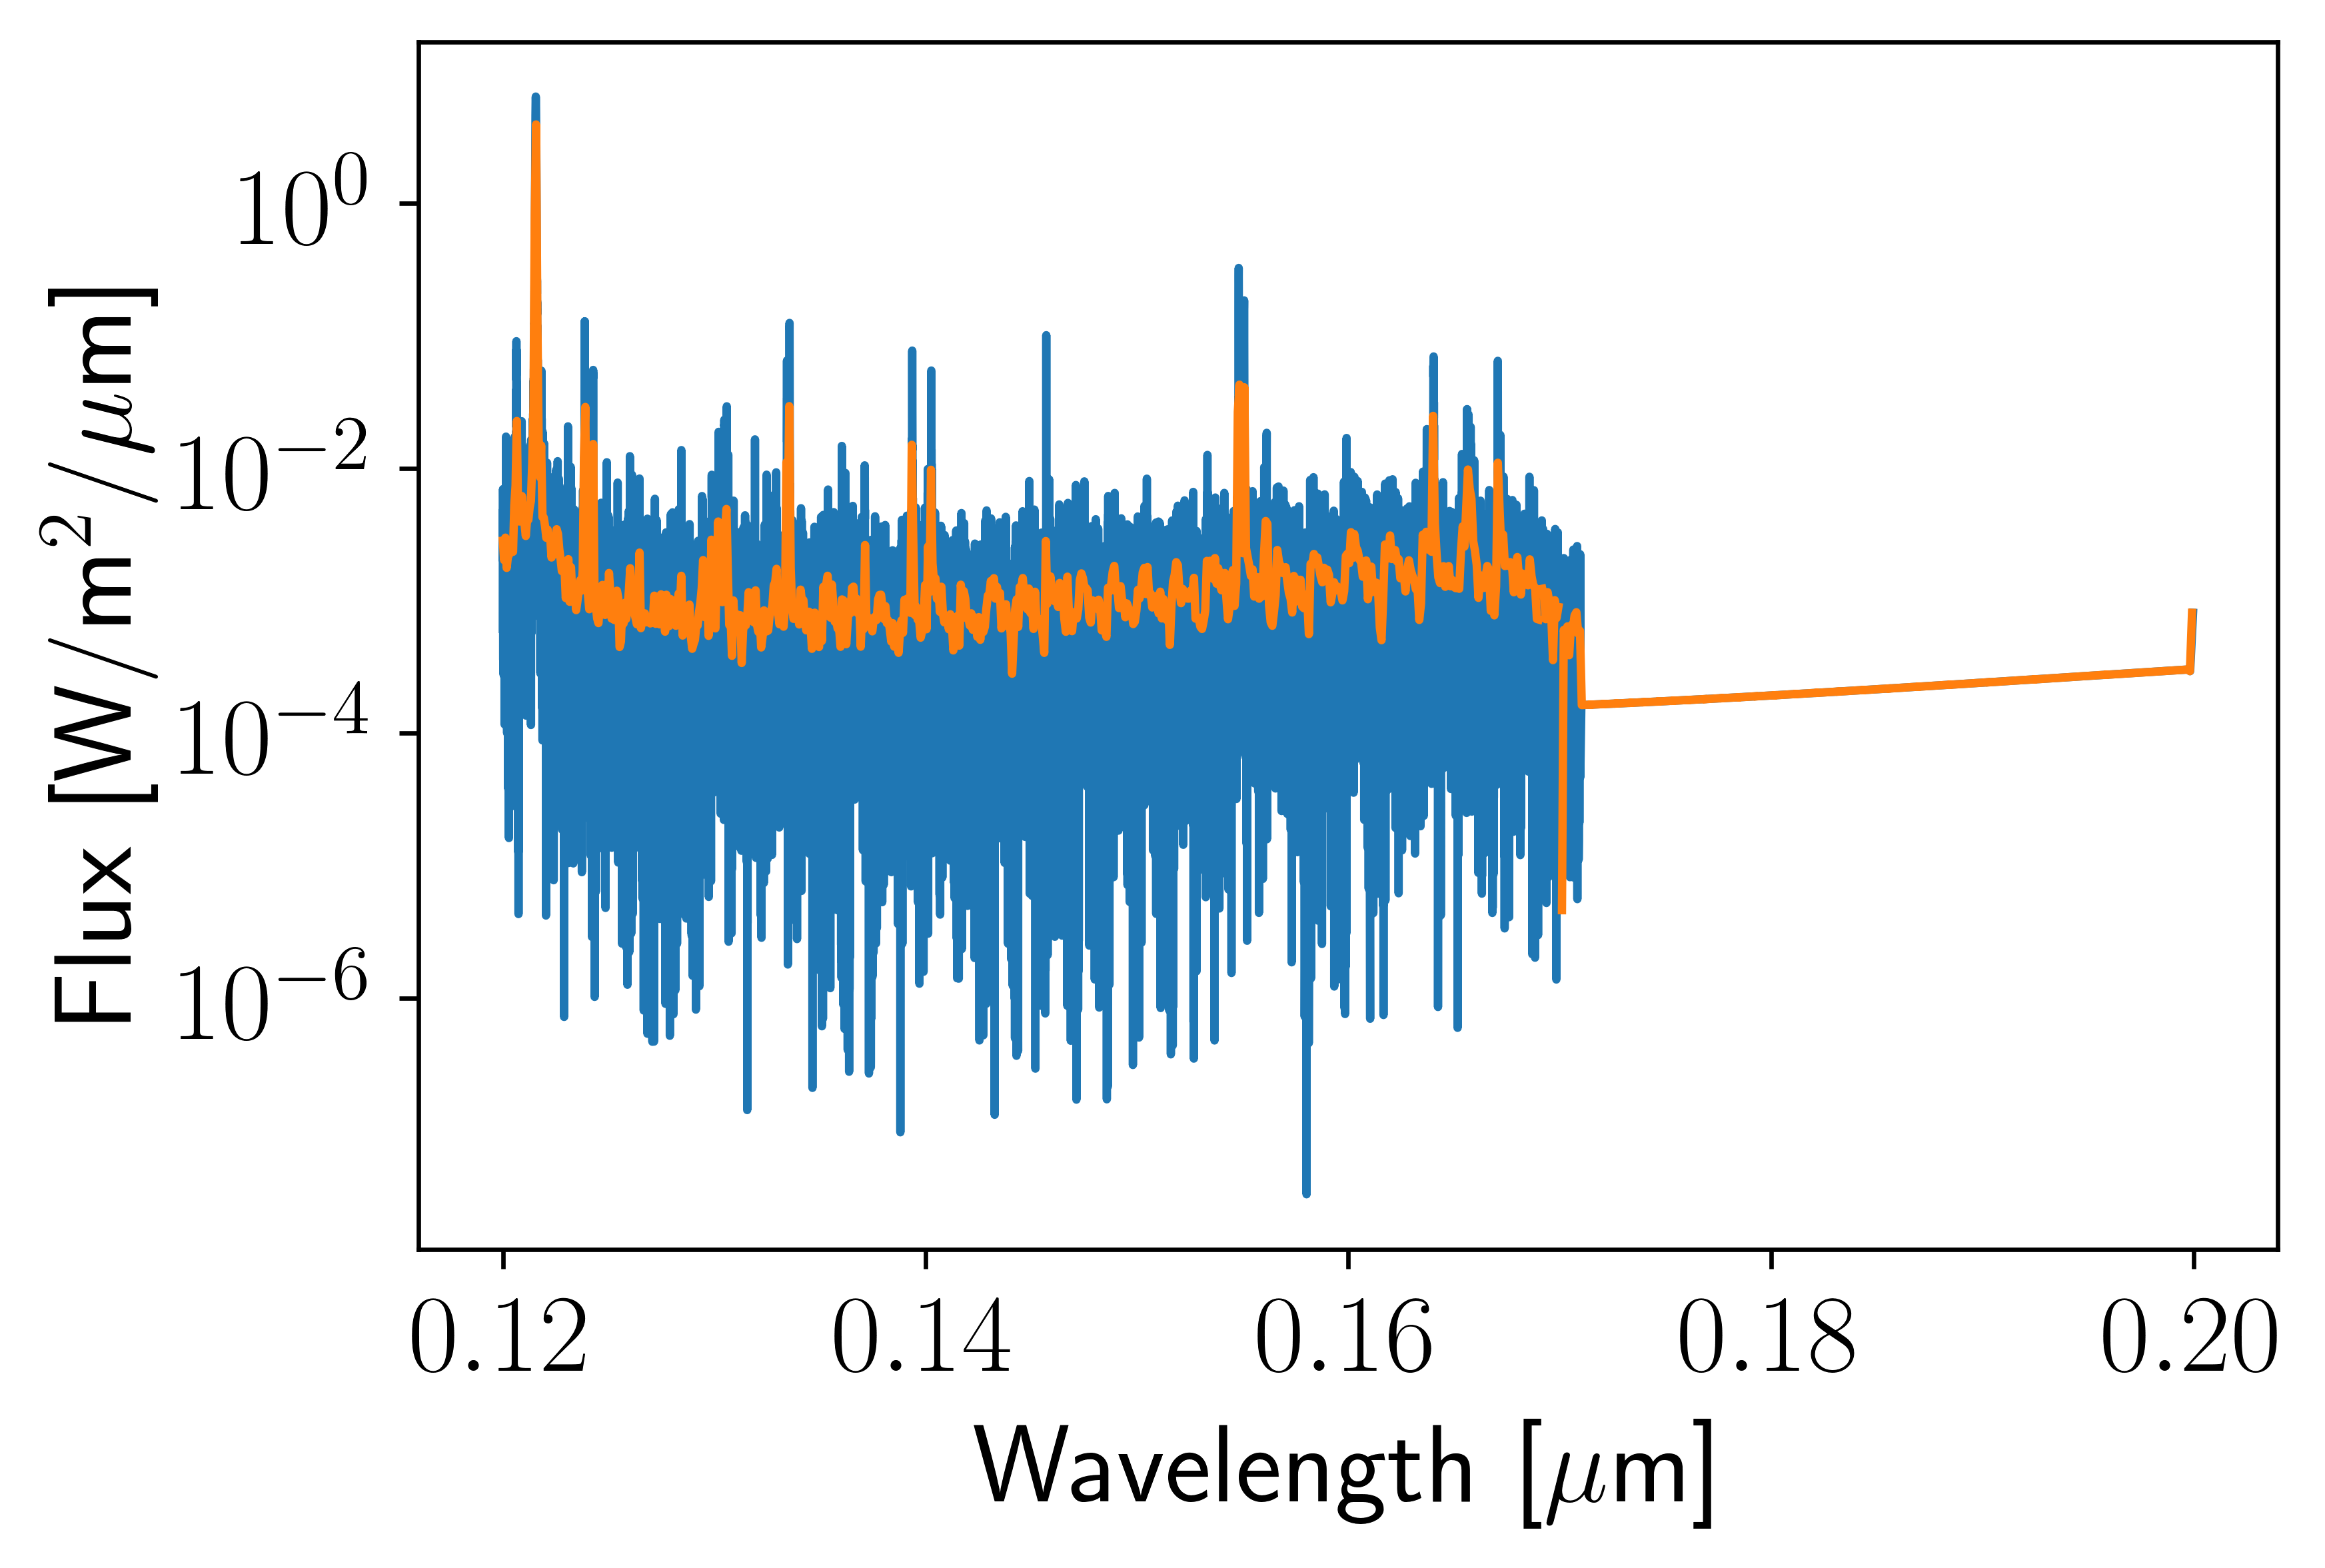

In [6]:
lammin = 0.12
lammax = 0.2
R = 2000

# Construct new low-res wavelength grid
wl, dwl = cg.noise_routines.construct_lam(lammin, lammax, R)

# Down-bin flux to low-res
flr = cg.downbin_spec(flux, lam, wl, dlam=dwl)

# Plot
m = (lam > lammin) & (lam < lammax)
plt.plot(lam[m], flux[m])
plt.plot(wl, flr)
plt.yscale("log")
plt.xlabel(r"Wavelength [$\mu$m]")
plt.ylabel(r"Flux [W/m$^2$/$\mu$m]");

In [7]:
print(np.sum(~np.isfinite(flr)))

26
